
# **2D Image To 3D VR Model**

We will implement a method that create a 3D model from a 2D image that can be viewed later in webVR using the A-Frame.

**Import Libraries**

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt

**Load 2D Image**

In [4]:
aa = cv.imread('1.png')
aa = cv.resize(aa, (32, 32), interpolation = cv.INTER_CUBIC)
aa = cv.rotate(aa, cv.ROTATE_90_CLOCKWISE)

In [5]:
aa.shape

(32, 32, 3)

**Process 2D Image**

We will convert pixels with R,G,B component value of 225 to grey.

In [6]:
for i in range(aa.shape[0]):
    for j in range(aa.shape[1]):
        if aa[i,j,0]>225 and aa[i,j,1]>225 and aa[i,j,2]>225:
            aa[i,j,0] = 128
            aa[i,j,1] = 128
            aa[i,j,2] = 128

**Create 3D Object**

We will iterate through the whole image, select pixels that are not gray(128,128,128), and create an a-box with the same color for every selected pixel.

In [8]:
#<a-box id="new" color="blue" position="2 2 2" ></a-box>
ind = 1
strlis = []
for i in range(aa.shape[0]):
    for j in range(aa.shape[1]):
        if aa[i,j,0]!=128 and aa[i,j,1]!=128 and aa[i,j,2]!=128:
            str1 = '<a-box id="new" color="'
            colo = '#%02x%02x%02x' % (aa[i,j,2], aa[i,j,1], aa[i,j,0])
            str2 = colo+'"'+' position='
            str3 = '"'+str(i)+' '+str(j)+' '+str(ind)+'"'+'></a-box>'
            strlis.append(str1+str2+str3)
    ind = ind + 1

In [9]:
len(strlis)

469

**Create A-Frame Code File**

We will write the A-Frame code to a new file.

In [10]:
myfile = open("3DGenerated.txt", "w")
for line in strlis:
   myfile.write("%sn" % line)
myfile.close()

**Show A-Frame Visualization**

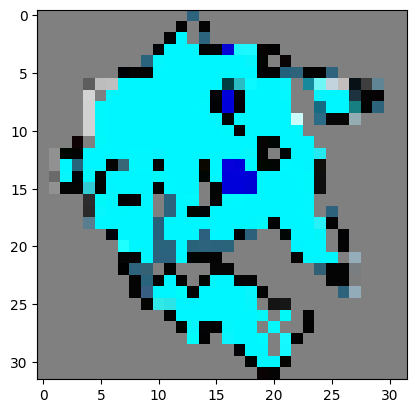

In [11]:
plt.imshow(aa)